# Universal Rabbit equations

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import ipywidgets as ipw

* [Equation for the model]:
* $\dot{N}_i = \delta_{i,0} \left(1-N_0\right)N_0 + \sum_j A_{i,j} N_i N_j - \Gamma_i N_i$, where $N_i$ is the number of individual of species $i$,  $\Gamma_i$ is the death rate of species $i$, $A$ is the feeding matrix.

In [65]:
def init_params(n_species, p_interact):
    A = np.zeros((n_species, n_species))
    gamma = np.zeros(n_species)

    mask = np.random.rand(n_species, n_species) < p_interact

    # all eating bunnies
    A[0, 1:] = - np.ones(n_species-1)

    # relations between predators
    for i in range(1, n_species):
        gamma[i] = np.random.rand()
        for j in range(i+1, n_species):
            if mask[i, j]:
                A[i, j] = np.random.rand()
                A[j, i] = -1

    return A, gamma

def derivative(N, t, A, gamma):
    dotN = np.zeros(N.shape)
    dotN[0] = (1 - N[0]) * N[0]
    dotN += (A @ N) * N
    dotN -= gamma * N
    return dotN

In [74]:
Nt = 10000
t_max = 30. # days
p_interact = 1.0
t = np.linspace(0.,t_max, Nt)
n_predators = 1
N0 = np.ones(n_predators + 1)
A, gamma = init_params(n_predators + 1, p_interact)

res = integrate.odeint(derivative, N0, t, args = (A, gamma))
N = res.T

In [75]:
print(A, gamma)

[[ 0. -1.]
 [ 0.  0.]] [0.         0.83212309]


In [76]:
N.shape

(2, 10000)

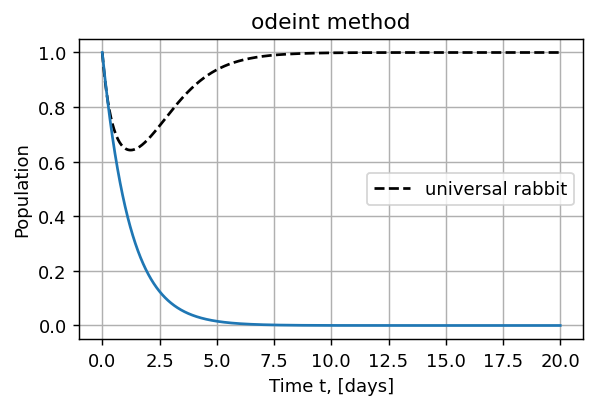

In [78]:
t_plot = 20

fig, ax = plt.subplots(1,1, figsize = (5,3), dpi=130)
plt.grid()
plt.title("odeint method")
plt.plot(t[t<t_plot], N[0,t<t_plot].T, '--', label = 'universal rabbit', color = 'k')
plt.plot(t[t<t_plot], N[1:,t<t_plot].T)
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()